## ARIMA CODE
### Preprocess data

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

/Applications/anaconda2/envs/py27/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('monthly-milk-production-pounds-p.csv')

In [4]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [8]:
df.columns=['Month','Milk in Pounds per Cow']

In [9]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [10]:
df.tail()

,Month,Milk in Pounds per Cow
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,Monthly milk production: pounds per cow. Jan 6...,NaN


In [11]:
df.drop(168,axis=0,inplace=True)

In [12]:
df.tail()

,Month,Milk in Pounds per Cow
163,1975-08,858.0
164,1975-09,817.0
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0


In [14]:
df['Month']=pd.to_datetime(df['Month'])

In [15]:
df.head()

,Month,Milk in Pounds per Cow
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


In [16]:
df.set_index('Month',inplace=True)

In [17]:
df.index

DatetimeIndex(['1962-01-01', '1962-02-01', '1962-03-01', '1962-04-01',
               '1962-05-01', '1962-06-01', '1962-07-01', '1962-08-01',
               '1962-09-01', '1962-10-01',
               ...
               '1975-03-01', '1975-04-01', '1975-05-01', '1975-06-01',
               '1975-07-01', '1975-08-01', '1975-09-01', '1975-10-01',
               '1975-11-01', '1975-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=168, freq=None)

In [18]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Milk in Pounds per Cow,168.0,754.708333,102.204524,553.0,677.75,761.0,824.5,969.0


### Visualize data

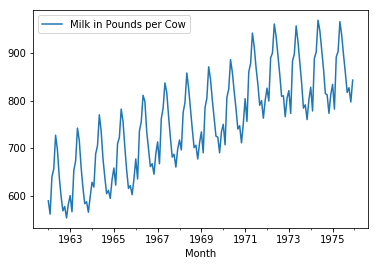

In [20]:
df.plot()

In [21]:
time_series=df['Milk in Pounds per Cow']

In [22]:
type(time_series)

pandas.core.series.Series

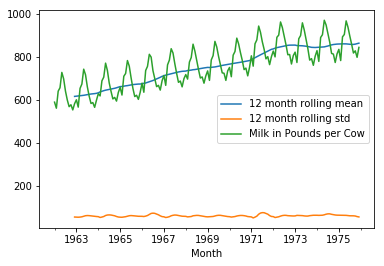

In [32]:
time_series.rolling(12).mean().plot(label='12 month rolling mean')
time_series.rolling(12).std().plot(label='12 month rolling std')
time_series.plot()
plt.legend()#show the lables of columns

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [42]:
decomp=seasonal_decompose(time_series,freq=12)#specify frequency


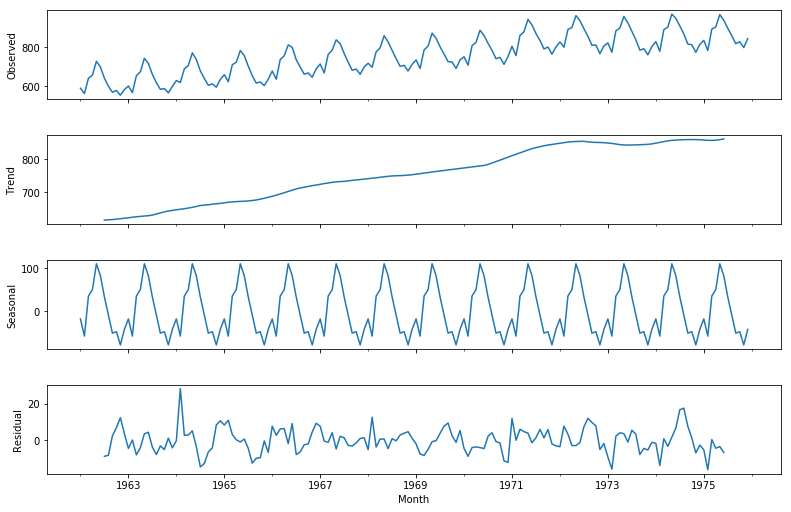

In [43]:
fig=decomp.plot()
fig.set_size_inches(12,8)

### Hypothesis and dealing with data

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
result

(-1.3038115874221228,
 0.62742670860303473,
 13,
 154,
 {'1%': -3.4735425281962091,
  '10%': -2.5768780536346769,
  '5%': -2.880497674144038},
 1115.1730447395112)

In [53]:
result =adfuller(df['Milk in Pounds per Cow'])

In [54]:
# test if this is stationary using hypothesis
def adf_check(time_series):
    result=adfuller(time_series)
    print('Augmented Dicky-Fuller Test')
    labels=['ADF Test Statistic','p-value','# of lags','Num of Obeservations used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value))
    if result[1]<=0.05:
        print('strong evidence against null hypothesis')
        print('reject null hypothesis')
        print('Data has no unit root and is stationary')
    else:
        print('weak evidence against null hypothesis')
        print('fail to reject null hypothesis')
        print('Data has a unit root,it is no-stationary')

In [55]:
adf_check(df['Milk in Pounds per Cow'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -1.30381158742
p-value : 0.627426708603
# of lags : 13
Num of Obeservations used : 154
weak evidence against null hypothesis
fail to reject null hypothesis
Data has a unit root,it is no-stationary


### take difference

In [57]:
df['first difference']=df['Milk in Pounds per Cow']-df['Milk in Pounds per Cow'].shift(1)

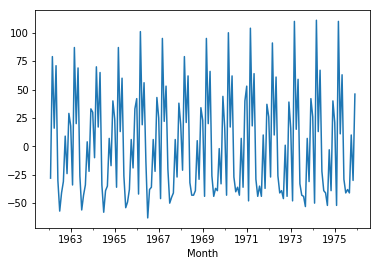

In [58]:
df['first difference'].plot()

In [59]:
adf_check(df['first difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -3.05499555865
p-value : 0.0300680040018
# of lags : 14
Num of Obeservations used : 152
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


In [60]:
df['Milk second difference']=df['first difference']-df['first difference'].shift(1)

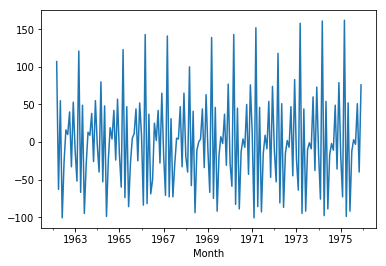

In [61]:
df['Milk second difference'].dropna().plot()

In [63]:
df['Seasonal Difference']=df['Milk in Pounds per Cow']-df['Milk in Pounds per Cow'].shift(12)

In [71]:
df['Seasonal Difference'].dropna(inplace=True)

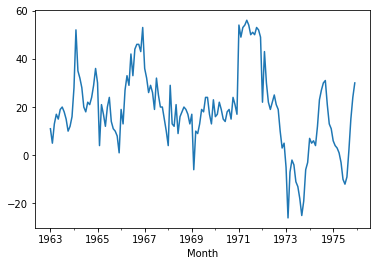

In [70]:
df['Seasonal Difference'].plot()

In [67]:
adf_check(df['Seasonal Difference'])

Augmented Dicky-Fuller Test
ADF Test Statistic : -2.33541931436
p-value : 0.160798805277
# of lags : 12
Num of Obeservations used : 143
weak evidence against null hypothesis
fail to reject null hypothesis
Data has a unit root,it is no-stationary


In [75]:
df['Seasonal First Difference']=df['first difference']-df['first difference'].shift(12)

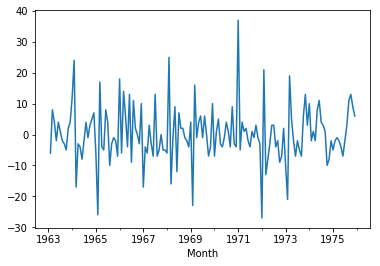

In [76]:
df['Seasonal First Difference'].plot()

In [77]:
adf_check(df['Seasonal First Difference'].dropna())

Augmented Dicky-Fuller Test
ADF Test Statistic : -5.03800227492
p-value : 1.86542343188e-05
# of lags : 11
Num of Obeservations used : 143
strong evidence against null hypothesis
reject null hypothesis
Data has no unit root and is stationary


### Auto correlation plot

In [79]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

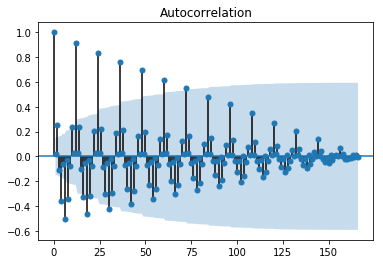

In [81]:
fig_first=plot_acf(df['first difference'].dropna())

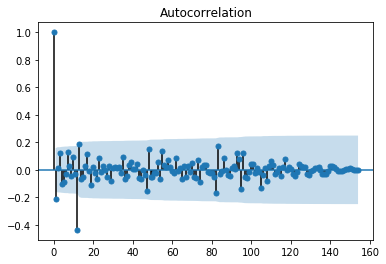

In [82]:
fig_seasonal_first=plot_acf(df['Seasonal First Difference'].dropna())

In [ ]:
# acturally pandas can plot this kind of autocorrelation plot itself

In [83]:
from pandas.plotting import autocorrelation_plot

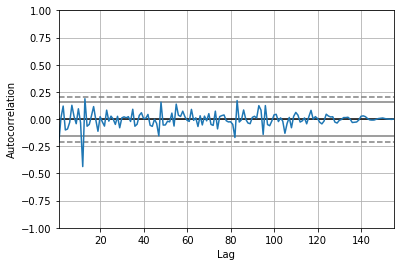

In [84]:
autocorrelation_plot(df['Seasonal First Difference'].dropna())

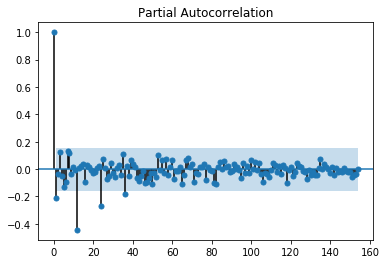

In [88]:
result=plot_pacf(df['Seasonal First Difference'].dropna())#remember to dropna

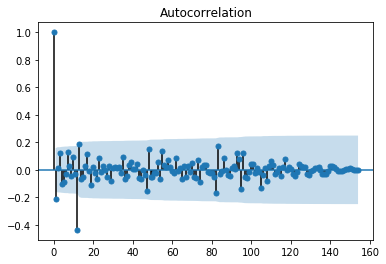

In [90]:
result2=plot_acf(df['Seasonal First Difference'].dropna())

### Use of ARIMA model

In [92]:
from statsmodels.tsa.arima_model import ARIMA

In [93]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  Parameters
 |  ----------
 |  endog : array-like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array-like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array-like of datetime, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M', 'A', or 'Q'. This is optional if dates are given.
 |  
 |  
 |  Notes
 |  -----
 |  If exogenous variables are given, then the model that is fit is
 

In [95]:
model=sm.tsa.statespace.SARIMAX(df['Milk in Pounds per Cow'],order=(0,1,0),seasonal_order=(1,1,1,12))

In [96]:
result=model.fit()

In [97]:
print(result.summary())

                                 Statespace Model Results                                 
Dep. Variable:             Milk in Pounds per Cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, 1, 12)   Log Likelihood                -534.065
Date:                            Sun, 24 Dec 2017   AIC                           1074.131
Time:                                    14:57:54   BIC                           1083.503
Sample:                                01-01-1962   HQIC                          1077.934
                                     - 12-01-1975                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.5860      0.102   

In [98]:
result.resid#errroer

Month
1962-01-01    589.000000
1962-02-01    -28.000000
1962-03-01     79.000000
1962-04-01     16.000000
1962-05-01     71.000000
1962-06-01    -30.000000
1962-07-01    -57.000000
1962-08-01    -41.000000
1962-09-01    -31.000000
1962-10-01      9.000000
1962-11-01    -24.000000
1962-12-01     29.000000
1963-01-01   -276.500828
1963-02-01     -6.001008
1963-03-01      8.002845
1963-04-01      4.000576
1963-05-01     -1.997443
1963-06-01      3.998920
1963-07-01      0.997947
1963-08-01     -2.001476
1963-09-01     -3.001116
1963-10-01     -4.999676
1963-11-01      1.999136
1963-12-01      4.001044
1964-01-01     11.980057
1964-02-01     21.216675
1964-03-01    -13.288272
1964-04-01     -1.144490
1964-05-01     -4.926563
1964-06-01     -6.145184
                 ...    
1973-07-01      0.055591
1973-08-01     -6.173488
1973-09-01     -9.576142
1973-10-01      2.410388
1973-11-01      6.632801
1973-12-01      3.259519
1974-01-01      0.696325
1974-02-01     -9.375288
1974-03-01     10.3

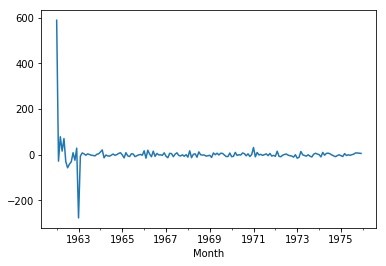

In [99]:
result.resid.plot()

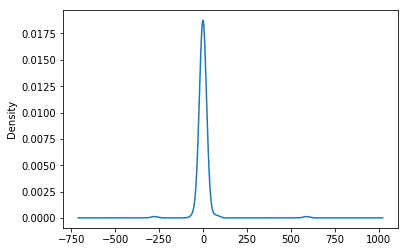

In [100]:
result.resid.plot(kind='kde')#look at the distribution of the errors

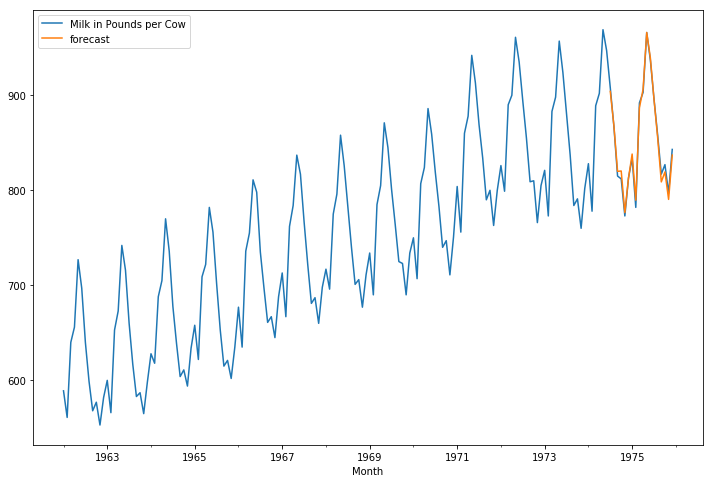

In [111]:
df['forecast']=result.predict(start=150,end=250
                             )#acturally if you do not have time you cannot predict
df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))#cool

In [112]:
#forecast real values

In [113]:
df.tail()

,Milk in Pounds per Cow,first difference,Milk second difference,Seasonal Difference,Seasonal First Difference,forecast
Month,,,,,,
1975-08-01,858.0,-38.0,3.0,-9.0,3.0,855.358617
1975-09-01,817.0,-41.0,-3.0,2.0,11.0,808.841269
1975-10-01,827.0,10.0,51.0,15.0,13.0,819.323183
1975-11-01,797.0,-30.0,-40.0,24.0,9.0,790.427500
1975-12-01,843.0,46.0,76.0,30.0,6.0,837.063646


In [114]:
from pandas.tseries.offsets import DateOffset

In [116]:
future_dates=[df.index[-1]+DateOffset(months=x)for x in range(1,24)]

In [117]:
future_dates

[Timestamp('1976-01-01 00:00:00'),
 Timestamp('1976-02-01 00:00:00'),
 Timestamp('1976-03-01 00:00:00'),
 Timestamp('1976-04-01 00:00:00'),
 Timestamp('1976-05-01 00:00:00'),
 Timestamp('1976-06-01 00:00:00'),
 Timestamp('1976-07-01 00:00:00'),
 Timestamp('1976-08-01 00:00:00'),
 Timestamp('1976-09-01 00:00:00'),
 Timestamp('1976-10-01 00:00:00'),
 Timestamp('1976-11-01 00:00:00'),
 Timestamp('1976-12-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1977-02-01 00:00:00'),
 Timestamp('1977-03-01 00:00:00'),
 Timestamp('1977-04-01 00:00:00'),
 Timestamp('1977-05-01 00:00:00'),
 Timestamp('1977-06-01 00:00:00'),
 Timestamp('1977-07-01 00:00:00'),
 Timestamp('1977-08-01 00:00:00'),
 Timestamp('1977-09-01 00:00:00'),
 Timestamp('1977-10-01 00:00:00'),
 Timestamp('1977-11-01 00:00:00')]

In [120]:
future_df=pd.DataFrame(index=future_dates,columns=df.columns)

In [121]:
future_df

,Milk in Pounds per Cow,first difference,Milk second difference,Seasonal Difference,Seasonal First Difference,forecast
1976-01-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-02-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-03-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-04-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-05-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-06-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1976-10-01,NaN,NaN,NaN,NaN,NaN,NaN


In [122]:
final_df=pd.concat([df,future_df])

In [124]:
final_df.head()

,Milk in Pounds per Cow,first difference,Milk second difference,Seasonal Difference,Seasonal First Difference,forecast
1962-01-01,589.0,NaN,NaN,NaN,NaN,NaN
1962-02-01,561.0,-28.0,NaN,NaN,NaN,NaN
1962-03-01,640.0,79.0,107.0,NaN,NaN,NaN
1962-04-01,656.0,16.0,-63.0,NaN,NaN,NaN
1962-05-01,727.0,71.0,55.0,NaN,NaN,NaN


In [125]:
final_df.tail()

,Milk in Pounds per Cow,first difference,Milk second difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-08-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-09-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-10-01,NaN,NaN,NaN,NaN,NaN,NaN
1977-11-01,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
final_df['forecast']=result.predict(start=160,end=192)

In [132]:
final_df.tail()

,Milk in Pounds per Cow,first difference,Milk second difference,Seasonal Difference,Seasonal First Difference,forecast
1977-07-01,NaN,NaN,NaN,NaN,NaN,951.525751
1977-08-01,NaN,NaN,NaN,NaN,NaN,911.918840
1977-09-01,NaN,NaN,NaN,NaN,NaN,865.881041
1977-10-01,NaN,NaN,NaN,NaN,NaN,871.027162
1977-11-01,NaN,NaN,NaN,NaN,NaN,836.962872


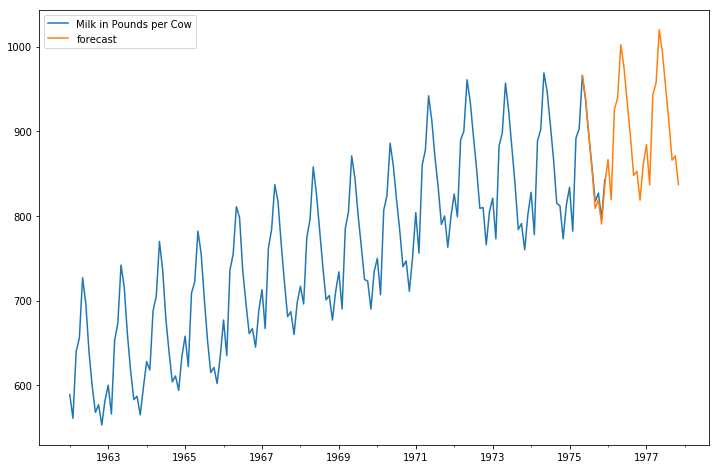

In [134]:
final_df[['Milk in Pounds per Cow','forecast']].plot(figsize=(12,8))